In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

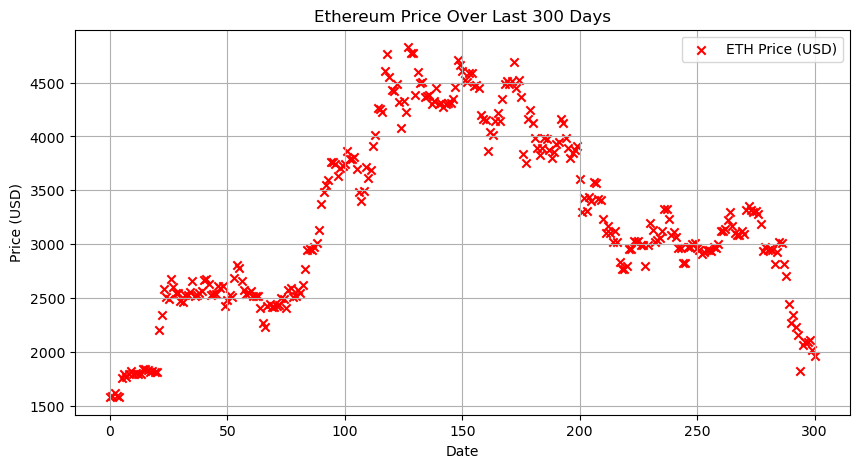

In [2]:
cg_url = 'https://api.coingecko.com/api/v3/coins/ethereum/market_chart'
params = {'vs_currency': 'usd', 'days': '300', 'interval': 'daily'}
response = requests.get(cg_url, params=params)
data = response.json()
prices = data['prices']


x_train = np.array([i for i in range(len(prices))])
y_train = np.array([price[1] for price in prices])
plt.figure(figsize=(10, 5))
plt.scatter(x_train, y_train, marker= 'x', c='r', label='ETH Price (USD)')
plt.title('Ethereum Price Over Last 300 Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [3]:
print(f"x_train shape is: {x_train.shape}")
print(f"y_train shape is: {y_train.shape}")
print(f"the number of training examples m is: {len(x_train)}")

x_train shape is: (301,)
y_train shape is: (301,)
the number of training examples m is: 301


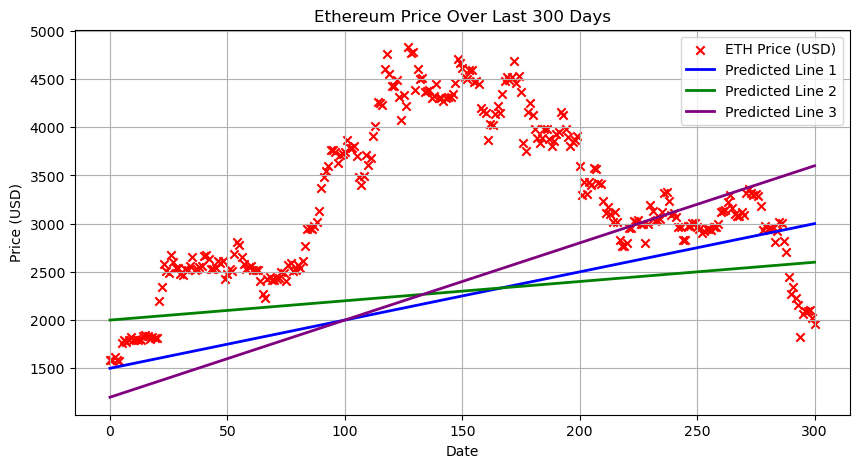

In [4]:
def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    return f_wb

w1, b1 = 5, 1500
w2, b2 = 2, 2000
w3, b3 = 8, 1200


tmp_f_wb1 = compute_model_output(x_train, w1, b1)
tmp_f_wb2 = compute_model_output(x_train, w2, b2)
tmp_f_wb3 = compute_model_output(x_train, w3, b3)


plt.figure(figsize=(10, 5))
plt.scatter(x_train, y_train, marker= 'x', c='r', label='ETH Price (USD)')
plt.plot(x_train, tmp_f_wb1, label='Predicted Line 1', color='b', linewidth=2)
plt.plot(x_train, tmp_f_wb2, label='Predicted Line 2', color='g', linewidth=2)
plt.plot(x_train, tmp_f_wb3, label='Predicted Line 3', color='purple', linewidth=2)
plt.title('Ethereum Price Over Last 300 Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [5]:
def compute_cost_function(x, y, w, b):
    m = x.shape[0]
    total_cost = 0
    for i in range(m):
        f_wb_i = w * x[i] + b
        cost_i = (f_wb_i - y[i]) ** 2
        total_cost += cost_i
    total_cost /= (2 * m)
    return total_cost

cost_function1 = compute_cost_function(x_train, y_train, w1, b1)
cost_function2 = compute_cost_function(x_train, y_train, w2, b2)
cost_function3 = compute_cost_function(x_train, y_train, w3, b3)

print(f"Model 1 (blue): w={w1}, b={b1}, cost_function={cost_function1:.2f}")
print(f"Model 2 (green): w={w2}, b={b2}, cost_function={cost_function2:.2f}")
print(f"Model 3 (purple): w={w3}, b={b3}, cost_function={cost_function3:.2f}")

print(f"\nBest model: ", end="")
if cost_function1 < cost_function2 and cost_function1 < cost_function3:
    print(f"Model 1 (lowest cost)")
elif cost_function2 < cost_function1 and cost_function2 < cost_function3:
    print(f"Model 2 (lowest cost)")
else:
    print(f"Model 3 (lowest cost)")

Model 1 (blue): w=5, b=1500, cost_function=821478.03
Model 2 (green): w=2, b=2000, cost_function=746431.17
Model 3 (purple): w=8, b=1200, cost_function=782119.33

Best model: Model 2 (lowest cost)


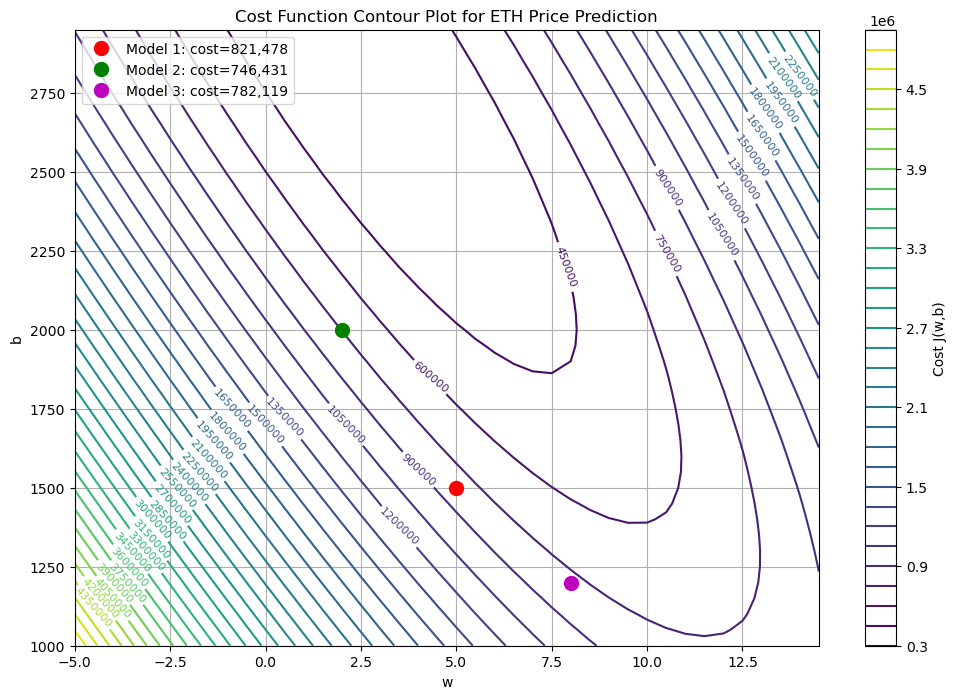

In [6]:
w_range = np.arange(-5, 15, 0.5) 
b_range = np.arange(1000, 3000, 50)
W, B = np.meshgrid(w_range, b_range)

Z = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Z[i, j] = compute_cost_function(x_train, y_train, W[i, j], B[i, j])


plt.figure(figsize=(12, 8))
contour = plt.contour(W, B, Z, levels=30, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)
plt.xlabel('w')
plt.ylabel('b')
plt.title('Cost Function Contour Plot for ETH Price Prediction')
plt.colorbar(label='Cost J(w,b)')
plt.plot(w1, b1, 'ro', markersize=10, label=f'Model 1: cost={cost_function1:,.0f}')
plt.plot(w2, b2, 'go', markersize=10, label=f'Model 2: cost={cost_function2:,.0f}')
plt.plot(w3, b3, 'mo', markersize=10, label=f'Model 3: cost={cost_function3:,.0f}')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb_i = w * x[i] + b
        err_i = f_wb_i - y[i]
        dj_dw += err_i * x[i]
        dj_db += err_i
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

def gradient_descent(x, y, w_in, b_in, alpha, num_iters):
    w = w_in
    b = b_in
    J_history = []
    p_history = [] 
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        
        if i < 100000:   
            cost = compute_cost_function(x, y, w, b)
            J_history.append(cost)
            p_history.append((w, b))
    return w, b, J_history, p_history

x_norm = (x_train - x_train.min()) / (x_train.max() - x_train.min())
y_norm = (y_train - y_train.min()) / (y_train.max() - y_train.min())
    
w_init, b_init = 0, 0
alpha = 0.01
num_iters = 10000
w_final, b_final, J_history, p_history = gradient_descent(x_norm, y_norm, w_init, b_init, alpha, num_iters)



x_range = x_train.max() - x_train.min()
y_range = y_train.max() - y_train.min()
y_min = y_train.min()
x_min = x_train.min()

w_original = w_final * (y_range / x_range)
b_original = b_final * y_range + y_min - w_original * x_min


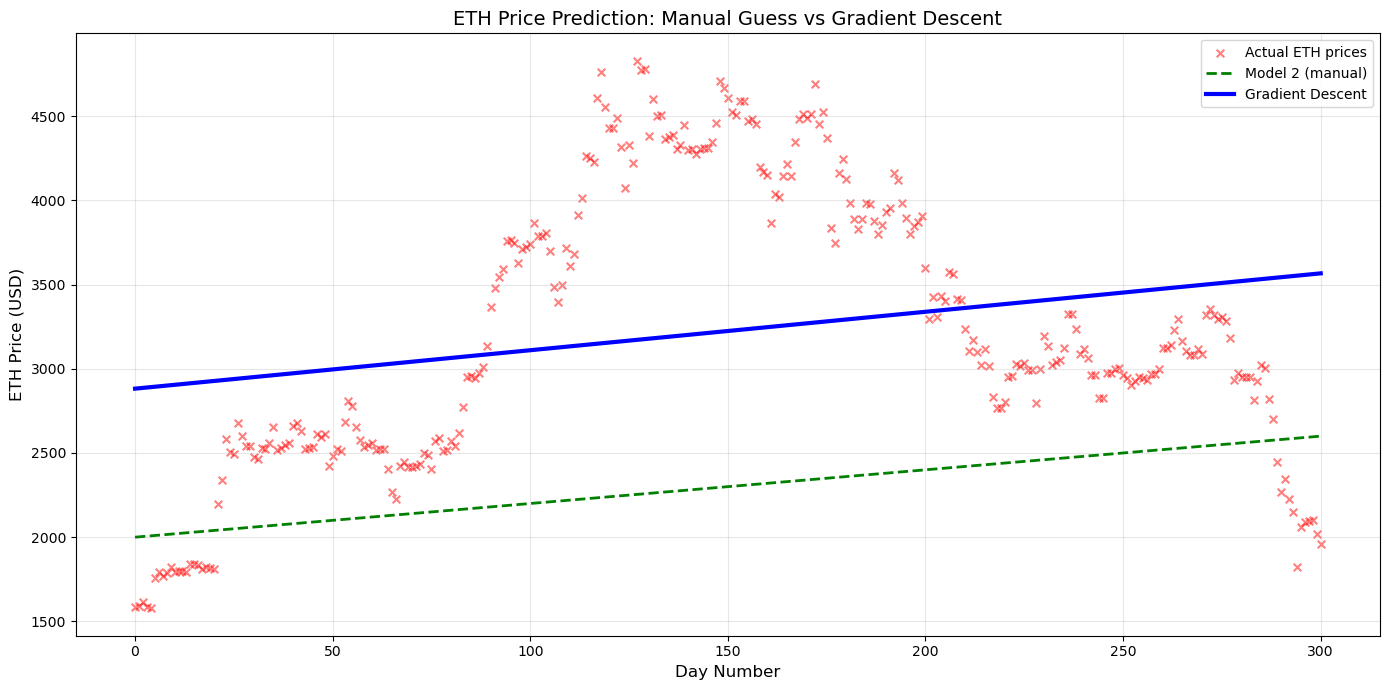

  Day 0:   $2881.94
  Day 150: $3224.28
  Day 300: $3566.62


In [8]:
predictions_optimal = compute_model_output(x_train, w_original, b_original)
predictions_model2 = compute_model_output(x_train, w2, b2)
plt.figure(figsize=(14, 7))
plt.scatter(x_train, y_train, marker='x', c='red', alpha=0.5, s=30, label='Actual ETH prices')
plt.plot(x_train, predictions_model2, 'g--', linewidth=2, 
         label='Model 2 (manual)')
plt.plot(x_train, predictions_optimal, 'b-', linewidth=3, 
         label='Gradient Descent')

plt.xlabel('Day Number', fontsize=12)
plt.ylabel('ETH Price (USD)', fontsize=12)
plt.title('ETH Price Prediction: Manual Guess vs Gradient Descent', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"  Day 0:   ${w_original * 0 + b_original:.2f}")
print(f"  Day 150: ${w_original * 150 + b_original:.2f}")
print(f"  Day 300: ${w_original * 300 + b_original:.2f}")